# K-Means Clustering Algorithm

`centroid` cluster center<br>
`inertia` sum of the squared distances from each point to its assigned centroid

In [11]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from pydataset import data
from sklearn.cluster import KMeans

np.random.seed(4)

In [12]:
# loading iris data
iris_df = data('iris')

In [13]:
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [20]:
# formating column names
#     lowercase
#     removing '.', replacing with '_'
iris_df.columns = iris_df.columns.str.lower().str.replace('.', '_')

In [21]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [76]:
# creating features df for modeling
X = iris_df[['petal_length', 'sepal_length']]
X.head()

,petal_length,sepal_length
1,1.4,5.1
2,1.4,4.9
3,1.3,4.7
4,1.5,4.6
5,1.4,5.0


In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

,petal_length,sepal_length
1,-1.340227,-0.900681
2,-1.340227,-1.143017
3,-1.397064,-1.385353
4,-1.283389,-1.506521
5,-1.340227,-1.021849


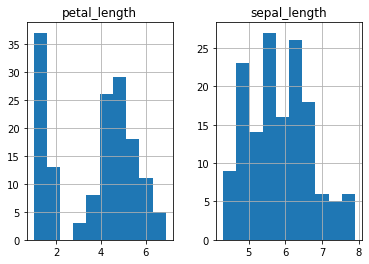

In [74]:
# visualize histograms
X.hist()
plt.show()


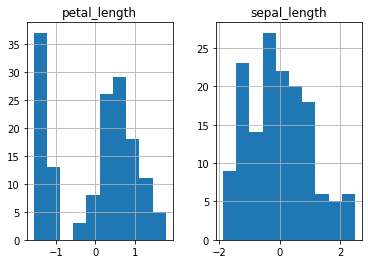

In [79]:
X_scaled.hist();

<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

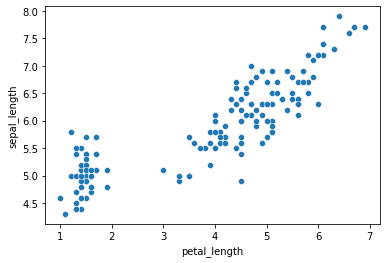

In [75]:
sns.scatterplot(data = X, x = 'petal_length', y = 'sepal_length')

<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

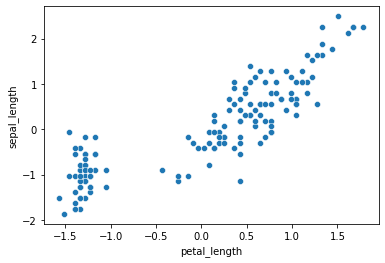

In [80]:
sns.scatterplot(data = X_scaled, x = 'petal_length', y = 'sepal_length')

In [24]:
# creating KMeans modeling object
kmeans = KMeans(n_clusters = 3)

In [25]:
# fitting our features df to the modeling algorithm
kmeans.fit(X)

KMeans(n_clusters=3)

In [26]:
# using the fitted algorithm to predict the cluster group of each observation
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [27]:
# adding the cluster predictions array to our original df
iris_df['cluster'] = kmeans.predict(X)

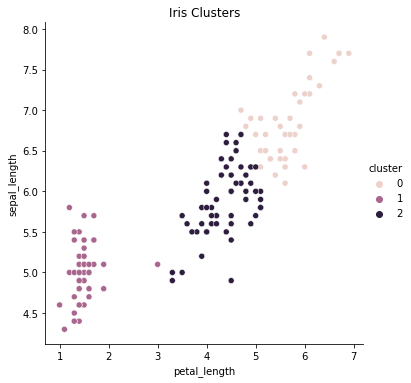

In [37]:
# visualizing the clusters
sns.relplot('petal_length', 'sepal_length', data = iris_df, hue = 'cluster')
plt.title('Iris Clusters')
plt.show()

## Properties of the KMeans Object
- `cluster_centers_` the center point of each cluster
- `labels_` the labels for each observation
- `inertia` the sum of the squared errors from each data point to its associated cluster

In [39]:
# an array of each of the clusters center (x, y) coordinates
kmeans.cluster_centers_

array([[5.67804878, 6.83902439],
       [1.49215686, 5.00784314],
       [4.39310345, 5.87413793]])

In [40]:
# creating a centroid df of the kmeans cluster centers
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_df

,petal_length,sepal_length
0,5.678049,6.839024
1,1.492157,5.007843
2,4.393103,5.874138


>Note that the K-Means algorithm is grouping each datapoint by cluster number and finding the average value for each feature. 

In [42]:
iris_df.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,6.839024,3.063415,5.678049,2.024390
1,5.007843,3.409804,1.492157,0.262745
2,5.874138,2.743103,4.393103,1.439655


In [43]:
iris_df.groupby('cluster')['petal_length', 'sepal_length'].mean()

,petal_length,sepal_length
cluster,,
0,5.678049,6.839024
1,1.492157,5.007843
2,4.393103,5.874138


>Keep in mind that the cluster centers are not datasets itself; they are the calculated averages for each group. 

<function matplotlib.pyplot.show(close=None, block=None)>

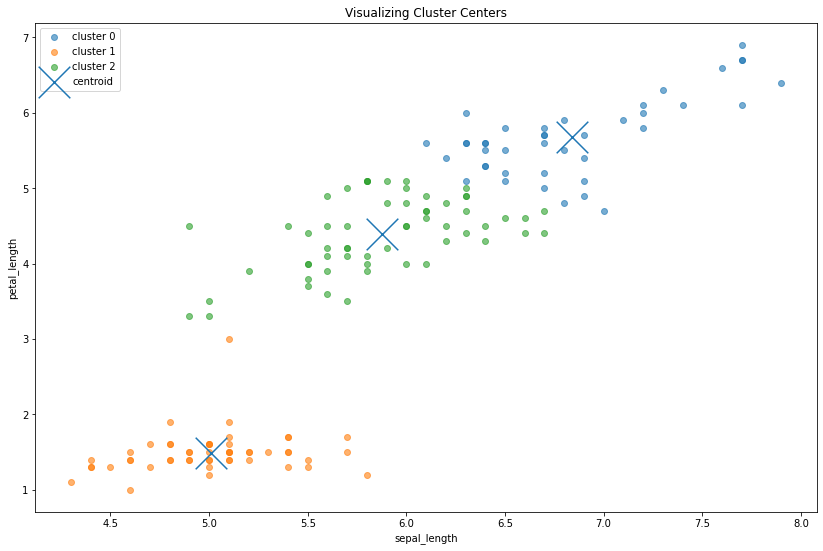

In [49]:
# looking at the cluster centers 'x' on top of the data
plt.figure(figsize = (14, 9))

for cluster, subset in iris_df.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label = 'cluster ' + str(cluster), alpha = .6)
    
centroids_df.plot.scatter(y = 'petal_length', x = 'sepal_length', marker = 'x', s = 1000, \
                       ax = plt.gca(), label = 'centroid')

plt.legend()
# plt.xlabel('sepal_length')
# plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')
plt.show


## Exploring different values of `k`

In [52]:
# creating model object, with 2 clusters
kmeans = KMeans(n_clusters = 2)

# fitting the data to the kmeans algorithm
kmeans.fit(X)

# adding cluster predictions to df
iris_df['cluster'] = kmeans.predict(X)

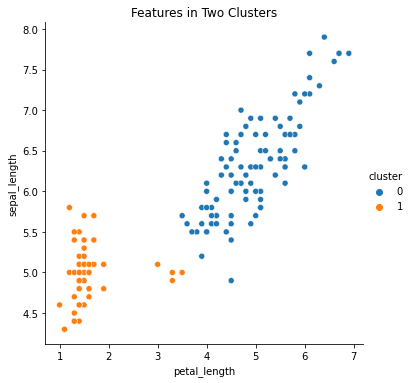

In [56]:
sns.relplot(data = iris_df, x = 'petal_length', y = 'sepal_length', hue = 'cluster')
plt.title('Features in Two Clusters')
plt.show()

In [59]:
# using a larger k cluster number
iris_df['cluster']  = kmeans = KMeans(n_clusters = 6).fit(X).predict(X)

In [60]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,4
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica,3
147,6.3,2.5,5.0,1.9,virginica,1
148,6.5,3.0,5.2,2.0,virginica,3
149,6.2,3.4,5.4,2.3,virginica,3


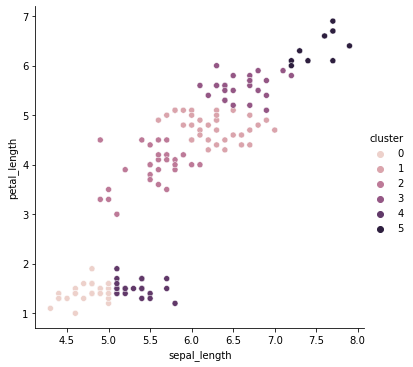

In [63]:
sns.relplot(data = iris_df, x = 'sepal_length', y = 'petal_length', hue = 'cluster')

# Choosing `k` with inertia
Inertia is the sum of the squared distances from each data point to its assigned centroid. We can use this quantity to help us determine a good value for `k`. 
>We cannot simply just choose a number of clusters `k` that minimizes inertia, because inertia will always decrease as we increase the number of clusters.
### Elbow Method
One way to use inertia to choose the number of `k` clusters is to use the **elbow method** where we visualize `inertia` on the y axis, again our number of `k` clusters on the x axis. 
>We will look for **elbow** of the curve, or the point where additional clusters doesn't give us a big reduction in inertia.

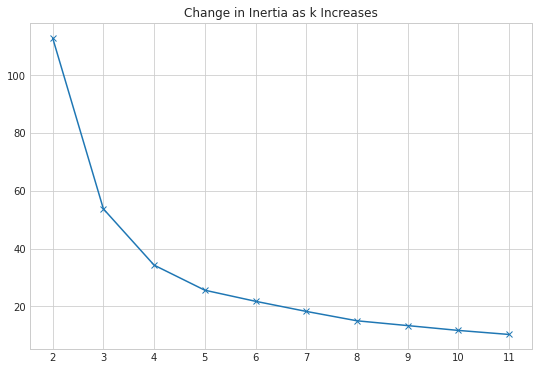

In [67]:
with plt.style.context('seaborn-whitegrid'):
#     plt.figure(figsize = (9. 6))
    plt.figure(figsize=(9, 6))
#     pd.Series({k: KMeans(k).fit(X).inertia_ for K in range(2, 12)}).plot(marker = 'x')
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')

    plt.xticks(range(2, 12))
    plt.title('Change in Inertia as k Increases')

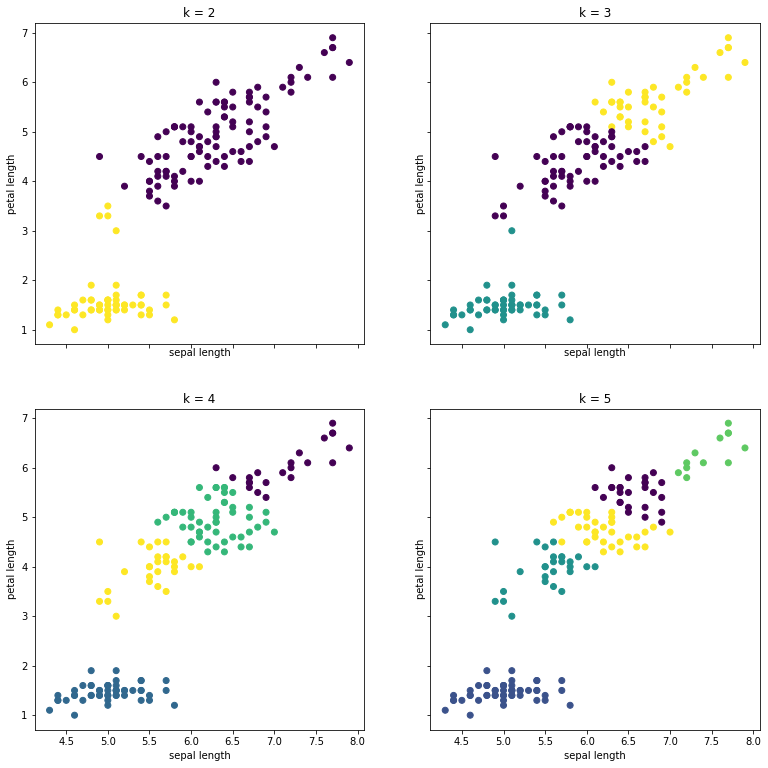

In [68]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_length, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')
